In [1]:
!pip install tensorflow

In [2]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Dataset paths
train_dir = "D:/Research/Snaked-Project/Images/test"
test_dir = "D:/Research/Snaked-Project/Images/train"

# Constants
img_width, img_height = 150, 150
batch_size = 32
epochs = 40
num_classes = 2

# Load and preprocess the dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Create the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=epochs)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

# Predict class for an input image
def predict_image_class(image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    if predicted_class == 0:
        return 'Snake is venomous'
    else:
        return 'Snake is non-venomous'

# Example usage
image_path = r'D:\Research\Snaked-Project\Images\test\Venomous\_837b1414-50e6-11e6-8d8d-a42edc5c5383.JPG'
predicted_class = predict_image_class(image_path)
print('Predicted class:', predicted_class)

Found 269 images belonging to 2 classes.
Found 1775 images belonging to 2 classes.
Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 537ms/step - accuracy: 0.4522 - loss: 0.8442
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5312 - loss: 0.6920  
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 639ms/step - accuracy: 0.4772 - loss: 0.6952
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4062 - loss: 0.7034  
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 553ms/step - accuracy: 0.5328 - loss: 0.6933
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4688 - loss: 0.6934  
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 621ms/step - accuracy: 0.4905 - loss: 0.6933
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6250 - loss: 0.6907  
Epoch 9/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.5144 - loss: 0.6927
Epoch 10/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4615 - loss: 0.6936  
Epoch 11/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.5241 - loss

In [11]:

# Using Resnet 50
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


data_dir = "D:/Research/Snaked-Project/Images"
train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "train"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "test"), transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load Pretrained ResNet (Modify for ResNet-X)
model = models.resnet50(pretrained=True)  
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_dataset.classes))  
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy of Resnet-50 is: {accuracy:.2f}%")


train_model(model, train_loader, epochs=10)
evaluate_model(model, test_loader)

Epoch 1, Loss: 0.7076
Epoch 2, Loss: 0.6878
Epoch 3, Loss: 0.6700
Epoch 4, Loss: 0.6557
Epoch 5, Loss: 0.6235
Epoch 6, Loss: 0.6047
Epoch 7, Loss: 0.6168
Epoch 8, Loss: 0.5850
Epoch 9, Loss: 0.5672
Epoch 10, Loss: 0.5229
Test Accuracy of Resnet-50 is: 68.03%


In [ ]:
import torch
import torch.nn as nn

import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import os

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset Paths
data_dir = "D:/Research/Snaked-Project/Images"
train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "train"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "test"), transform=transform)

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

# Load Pretrained Models
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
resnet101 = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)
resnext50 = models.resnext50_32x4d(weights=models.ResNeXt50_32X4D_Weights.IMAGENET1K_V1)
inception = models.inception_v3(weights=models.Inception_V3_Weights.IMAGENET1K_V1)

# Modify Fully Connected Layers
num_features_50 = resnet50.fc.in_features
num_features_101 = resnet101.fc.in_features
num_features_x = resnext50.fc.in_features
num_features_incep = inception.fc.in_features

resnet50.fc = nn.Identity()
resnet101.fc = nn.Identity()
resnext50.fc = nn.Identity()
inception.fc = nn.Identity()

# Hybrid Model
class HybridResNetInception(nn.Module):
    def __init__(self, resnet50, resnet101, resnext50, inception, num_classes):
        super(HybridResNetInception, self).__init__()
        self.resnet50 = resnet50
        self.resnet101 = resnet101
        self.resnext50 = resnext50
        self.inception = inception
        self.fc = nn.Linear(num_features_50 + num_features_101 + num_features_x + num_features_incep, num_classes)
    
    def forward(self, x):
        x1 = self.resnet50(x)
        x2 = self.resnet101(x)
        x3 = self.resnext50(x)
        x4 = self.inception(x)
        x = torch.cat((x1, x2, x3, x4), dim=1)
        x = self.fc(x)
        return x

# Initialize Hybrid Model
model = HybridResNetInception(resnet50, resnet101, resnext50, inception, len(train_dataset.classes)).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)

# Training Function
def train_model(model, train_loader, epochs=15):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy of Hybrid Model is: {accuracy:.2f}%")
    return accuracy

# Train and Evaluate
train_model(model, train_loader, epochs=15)
evaluate_model(model, test_loader)


In [ ]:
# Combination of RESNET Model
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import os

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset Paths
data_dir = "D:/Research/Snaked-Project/Images"
train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "train"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "test"), transform=transform)

# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

# Load Pretrained ResNet Models
resnet50 = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
resnet101 = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)
resnet152 = models.resnet152(weights=models.ResNet152_Weights.IMAGENET1K_V1)

# Modify Fully Connected Layers
num_features_50 = resnet50.fc.in_features
num_features_101 = resnet101.fc.in_features
num_features_152 = resnet152.fc.in_features

resnet50.fc = nn.Identity()
resnet101.fc = nn.Identity()
resnet152.fc = nn.Identity()

# Hybrid Model
class HybridResNet(nn.Module):
    def __init__(self, resnet50, resnet101, resnet152, num_classes):
        super(HybridResNet, self).__init__()
        self.resnet50 = resnet50
        self.resnet101 = resnet101
        self.resnet152 = resnet152
        self.fc = nn.Linear(num_features_50 + num_features_101 + num_features_152, num_classes)
    
    def forward(self, x):
        x1 = self.resnet50(x)
        x2 = self.resnet101(x)
        x3 = self.resnet152(x)
        x = torch.cat((x1, x2, x3), dim=1)
        x = self.fc(x)
        return x

# Initialize Hybrid Model
model = HybridResNet(resnet50, resnet101, resnet152, len(train_dataset.classes)).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)

# Training Function
def train_model(model, train_loader, epochs=15):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy of Hybrid ResNet is: {accuracy:.2f}%")
    return accuracy

# Train and Evaluate
train_model(model, train_loader, epochs=15)
evaluate_model(model, test_loader)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader
import os

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Image Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Dataset Paths
data_dir = "D:/Research/Snaked-Project/Images"
train_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "train"), transform=transform)
test_dataset = datasets.ImageFolder(root=os.path.join(data_dir, "test"), transform=transform)

# Training Function
def train_model(model, train_loader, epochs=15):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

# Evaluation Function
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy of resnet-100 is: {accuracy:.2f}%")
    return accuracy

if __name__ == '__main__':
    # Data Loaders (with num_workers=0 to avoid multiprocessing issue)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=0)

    # Load Pretrained ResNet-101 Model
    model = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, len(train_dataset.classes))
    model = model.to(device)

    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.0005, weight_decay=1e-4)

    # Train and Evaluate
    train_model(model, train_loader, epochs=15)
    evaluate_model(model, test_loader)


Epoch 1, Loss: 0.5915, Accuracy: 69.35%
Epoch 2, Loss: 0.5179, Accuracy: 75.21%
Epoch 3, Loss: 0.4472, Accuracy: 79.55%
Epoch 4, Loss: 0.3842, Accuracy: 82.65%
Epoch 5, Loss: 0.3905, Accuracy: 82.70%
Epoch 6, Loss: 0.3427, Accuracy: 85.35%
Epoch 7, Loss: 0.3392, Accuracy: 84.73%
Epoch 8, Loss: 0.3156, Accuracy: 86.70%
Epoch 9, Loss: 0.2739, Accuracy: 89.07%
Epoch 10, Loss: 0.2899, Accuracy: 88.11%
Epoch 11, Loss: 0.2706, Accuracy: 88.73%
Epoch 12, Loss: 0.2691, Accuracy: 88.73%
Epoch 13, Loss: 0.2261, Accuracy: 90.59%
Epoch 14, Loss: 0.1726, Accuracy: 93.58%
Epoch 15, Loss: 0.2423, Accuracy: 90.54%
Test Accuracy of resnet-100 is: 78.81%


Found 269 images belonging to 2 classes.
Found 1775 images belonging to 2 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


C:\Users\Vikram Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.5321 - loss: 0.8484 - val_accuracy: 0.7358 - val_loss: 0.5273
Epoch 2/10
1/8 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.7812 - loss: 0.4712

C:\Users\Vikram Kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.7812 - loss: 0.4712 - val_accuracy: 0.7330 - val_loss: 0.5231
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.7868 - loss: 0.4311 - val_accuracy: 0.7409 - val_loss: 0.5325
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.9231 - loss: 0.2328 - val_accuracy: 0.7114 - val_loss: 0.5884
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 32s 4s/step - accuracy: 0.8131 - loss: 0.4122 - val_accuracy: 0.7648 - val_loss: 0.4849
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8462 - loss: 0.5819 - val_accuracy: 0.7631 - val_loss: 0.4891
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.9070 - loss: 0.2697 - val_accuracy: 0.7756 - val_loss: 0.4754
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 4s/step - accuracy: 0.8750 - loss: 0.3251 - val_accuracy: 0.7756 - val_loss: 0.4781
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.9097 - loss: 0.2249 - val_accuracy: 0.7739 - val_loss: 0.4916
Epoch 10/10
8/8 ━━━

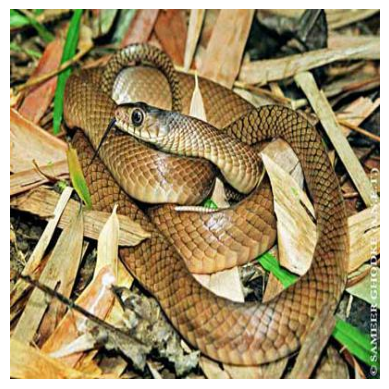

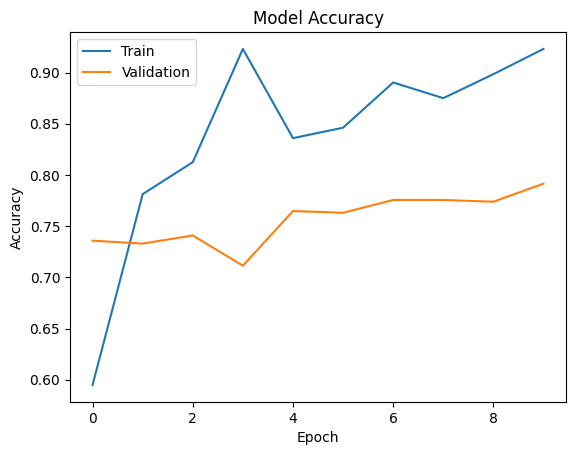

56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 497ms/step


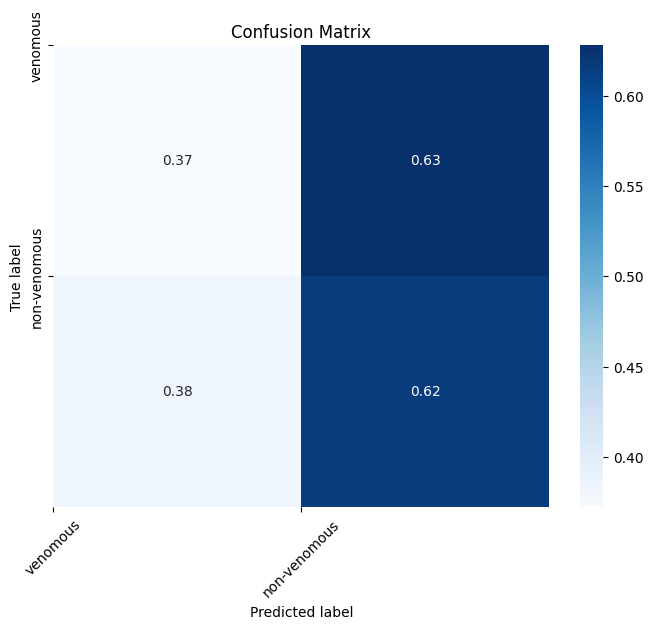

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
img_width, img_height = 224, 224
batch_size = 32
num_classes = 2
epochs = 10

# Function to load and preprocess the dataset
def load_dataset(train_dir, test_dir):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, test_generator

# Function to create the model with transfer learning
def create_model():
    base_model = MobileNetV2(input_shape=(img_width, img_height, 3), include_top=False, weights='imagenet')
    for layer in base_model.layers:
        layer.trainable = False

    model = keras.Sequential([
        base_model,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Function to plot the accuracy graph
def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Function to draw a colored confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_norm, annot=True, cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xticks(np.arange(len(classes)), classes, rotation=45)
    plt.yticks(np.arange(len(classes)), classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Function to predict the class for an input image
def predict_image_class(model, image_path):
    img = keras.preprocessing.image.load_img(image_path, target_size=(img_width, img_height))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])

    if predicted_class == 1:
        return 'venomous'
    else:
        return 'non-venomous'

# Load the dataset
train_dir = "D:/Research/Snaked-Project/Images/test"
test_dir = "D:/Research/Snaked-Project/Images/train"
train_generator, test_generator = load_dataset(train_dir, test_dir)

# Create the model
model = create_model()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples // batch_size,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples // batch_size)

# Calculate the accuracy of the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

# Predict class for an input image
image_path = r'D:\Research\Snaked-Project\Images\test\Non Venomous\1.jpg'
predicted_class = predict_image_class(model, image_path)
print('Predicted class:', predicted_class)

# Display the image
img = keras.preprocessing.image.load_img(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Plot the accuracy graph
plot_accuracy(history)

# Predict classes for the test dataset
test_generator.reset()
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Draw a colored confusion matrix
class_names = ['venomous', 'non-venomous']
plot_confusion_matrix(y_true, y_pred, class_names)
